In [68]:
import numpy as np
import pickle
import time
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pylab 
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
import missingno as msno
import os
from sklearn.compose import ColumnTransformer
from IPython.display import display, FileLink
import random
from pprint import pprint

# **Data Cleaning**

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print(train.shape)
train.head()

(891, 12)


PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

C:\Users\Ian\AppData\Local\Temp/ipykernel_16552/324537713.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  train.hist(ax = axes)


array([[<AxesSubplot:title={'center':'PassengerId'}>,
        <AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

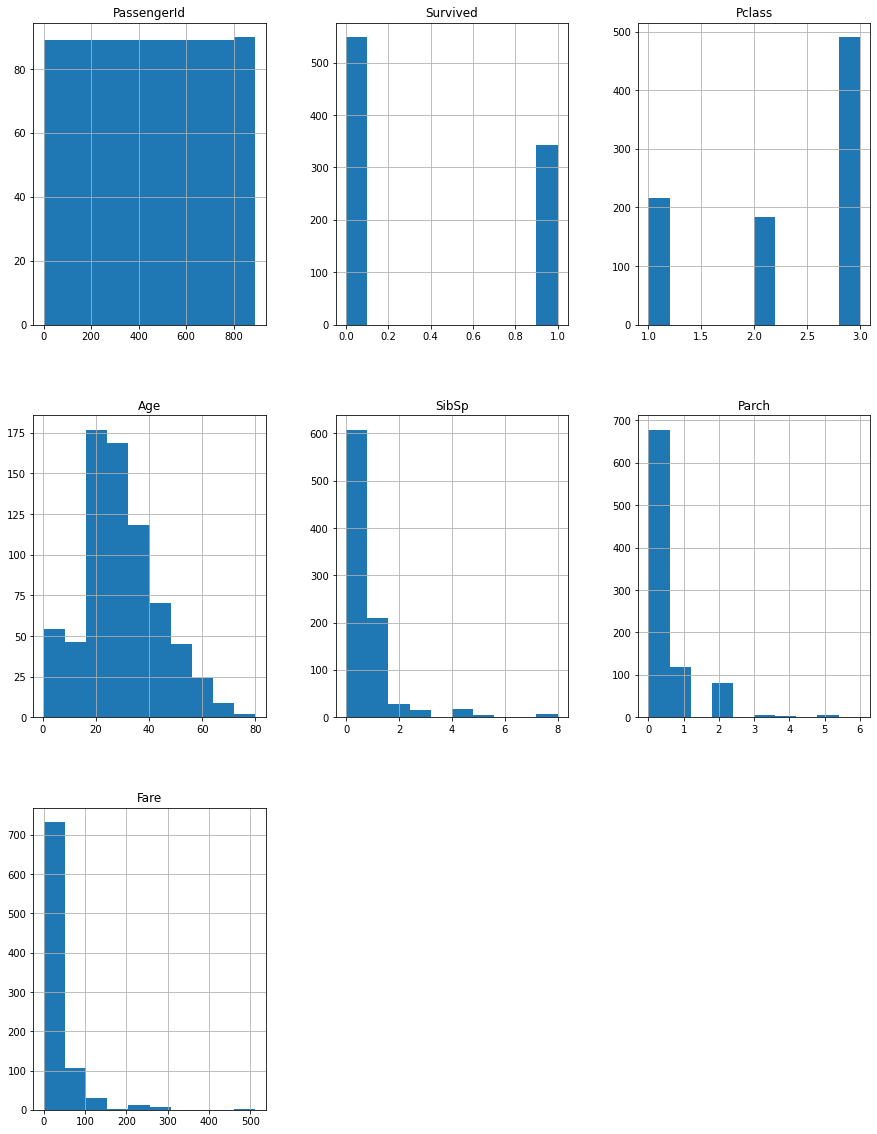

In [4]:
# distribution of each of the variables
fig = plt.figure(figsize=(15, 20))
axes = fig.gca()
train.hist(ax = axes)

**Invalid Data**

In [5]:
#deep copy of training dataset
clean_train = train.copy()
clean_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

<AxesSubplot:>

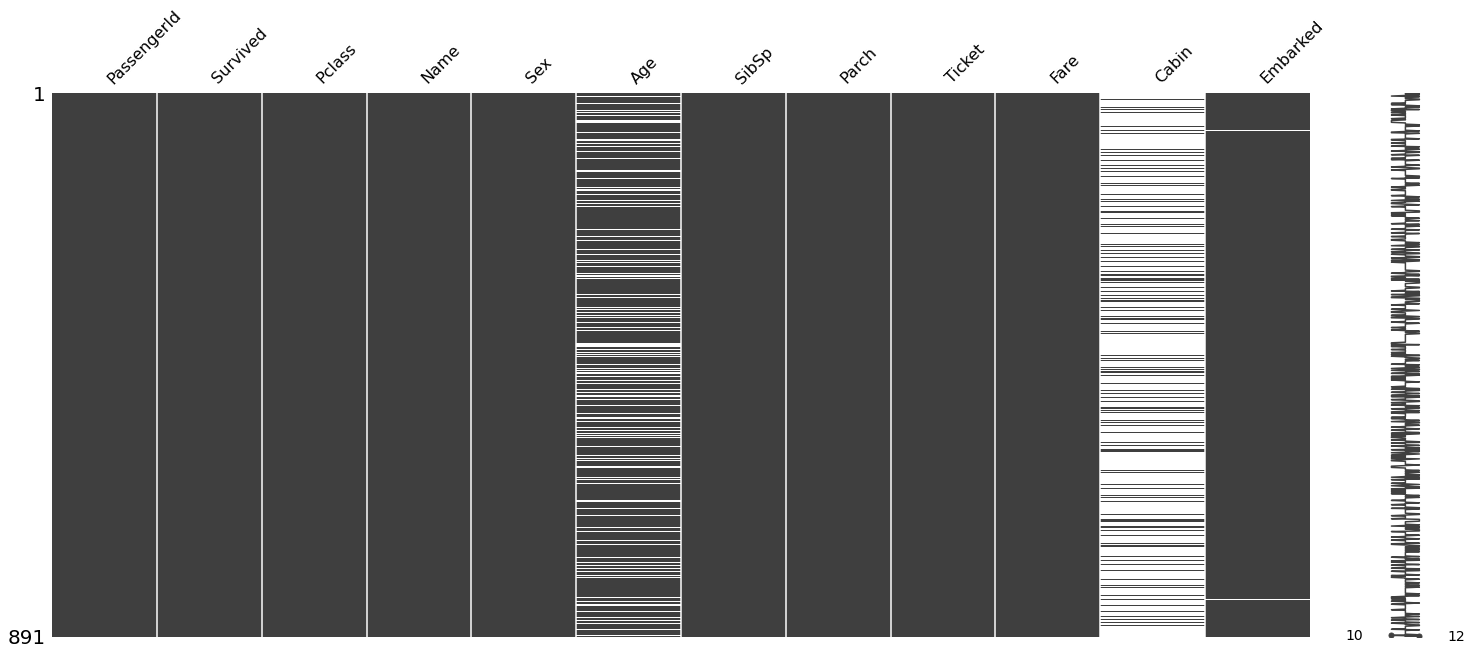

In [6]:
msno.matrix(clean_train)

In [7]:
#dropped PassengerID and Name column since all names are unique categorical values
clean_train = clean_train.drop(columns=['Name'])
clean_train = clean_train.drop(columns=['PassengerId'])

In [8]:
#clean_train['Cabin'].unique()
null_percentage = clean_train['Cabin'].isnull().mean() * 100
print("Percentage of null values in 'Cabin' column: {:.2f}%".format(null_percentage))
clean_train['Cabin'] = clean_train['Cabin'].fillna('NA') 

Percentage of null values in 'Cabin' column: 77.10%


In [9]:
#fixing invalid Cabin data

val = []

for index, row in clean_train['Cabin'].iteritems():
    if len(row) > 3 and row[3]==' ':
        count = 0;
        cabins = row.split(' ')
        for i, r in clean_train[clean_train['Cabin'] == row].iteritems():
            if(count<len(cabins)):
                val.append(cabins[count])
                count+=1
            else:
                val.append(cabins[count-1])
            
    elif row[0]=='F' and row[1]==' ':
        tmp = 'F' + str(random.randint(1, 148)) + row[1:]
        count = 0;
        cabins = tmp.split(' ')
        for i, r in clean_train[clean_train['Cabin'] == row].iteritems():
            if(count<len(cabins)):
                val.append(cabins[count])
                count+=1
            else:
                val.append(cabins[count-1])
    elif row[0]=='D'and len(row)==1:
        val.append(row+str(random.randint(1, 148)))
    else:
        val.append(row)

clean_train['New Cabin'] = pd.DataFrame(val)
clean_train.head()

Survived  Pclass     Sex   Age  SibSp  Parch            Ticket     Fare  \
0         0       3    male  22.0      1      0         A/5 21171   7.2500   
1         1       1  female  38.0      1      0          PC 17599  71.2833   
2         1       3  female  26.0      0      0  STON/O2. 3101282   7.9250   
3         1       1  female  35.0      1      0            113803  53.1000   
4         0       3    male  35.0      0      0            373450   8.0500   

  Cabin Embarked New Cabin  
0    NA        S        NA  
1   C85        C       C85  
2    NA        S        NA  
3  C123        S      C123  
4    NA        S        NA

**Outliers**

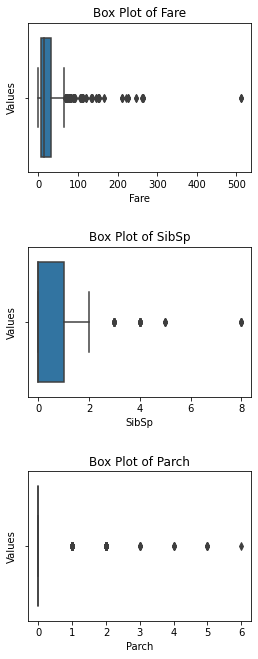

In [10]:
#columns that are skewed based on histogram; creates boxplot for skewed columns
skew = ['Fare','SibSp','Parch']

fig, axes = plt.subplots(nrows=len(skew), figsize=(4,11)) #fig contains subplot, 
                                                                     #an array of subplots

for i, column in enumerate(skew):
    #axes[i].boxplot(clean_train[column])
    sns.boxplot(x=clean_train[column], ax=axes[i])
    axes[i].set_title('Box Plot of {}'.format(column))
    axes[i].set_xlabel(column)
    axes[i].set_ylabel("Values")


plt.subplots_adjust(hspace=0.5)
plt.show()
#removing the outliers doesn't seem reasonable as there are only a few and the values are reasonable

**Data Imputation**

In [11]:
#Age column
clean_train['Age'].fillna(clean_train['Age'].mode().iloc[0], inplace=True)

In [12]:
#Embarked column
clean_train['Embarked'].fillna(clean_train['Embarked'].mode().iloc[0], inplace=True)

Amount of rows that have price as 0: 15 rows


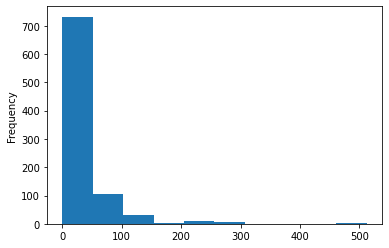

In [13]:
#Fare column

print(f"Amount of rows that have price as 0: {len(clean_train['Fare'])-len(clean_train[clean_train['Fare']>0])} rows") 

#Since distribution is heavily skewed to the right, we will find the median of price for each Ticket Class
clean_train['Fare'].plot(kind='hist')
plt.show()

def impute_median(row):
    return clean_train[clean_train['Pclass']==row['Pclass']]['Fare'].median()


clean_train['Fare'] = clean_train['Fare'].replace(0, np.nan)
missing_fares = clean_train['Fare'].isnull()
clean_train.loc[missing_fares, 'Fare'] = clean_train[missing_fares].apply(impute_median, axis=1)

**Transformation for variables with skewed data**

[Text(0.5, 0, 'Fare (Log Transformed)'),
 Text(0, 0.5, 'Density'),
 Text(0.5, 1.0, 'Distribution of Log Transformed Fare')]

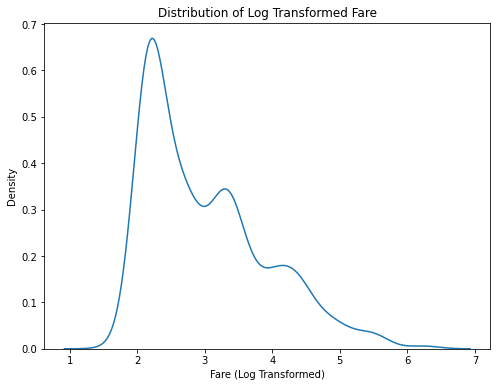

In [14]:
clean_train['Fare_log'] = np.log(clean_train['Fare'] + 1)
fig, ax = plt.subplots(figsize=(8, 6))
sns.kdeplot(data=clean_train['Fare_log'], ax=ax)
ax.set(xlabel='Fare (Log Transformed)', ylabel='Density', title='Distribution of Log Transformed Fare')

In [15]:
clean_train.isnull().sum(axis=0)

Survived     0
Pclass       0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Cabin        0
Embarked     0
New Cabin    0
Fare_log     0
dtype: int64

# **Feature Engineering**

In [16]:
#categorical column = Pclass
#Num columns to be aggregated = Age(median,std), SibSp(count), Parch(count), Fare(median,std,actual-median)

grouped_train = clean_train.groupby('Pclass')

#Since age and fare distrubutions are skewed, I chose median
clean_train[['age_Pclass_median','fare_Pclass_median']] = grouped_train[['Age', 'Fare']].transform('median')

clean_train[['age_Pclass_std','fare_Pclass_std']] = grouped_train[['Age', 'Fare']].transform('std')

clean_train[['SibSp_count','Parch_count']] = grouped_train[['SibSp', 'Parch']].transform('count') 

#fare-median
clean_train['fare_median_diff'] = clean_train['Fare']-clean_train['fare_Pclass_median']

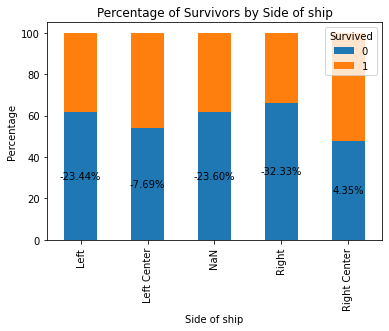

In [17]:
#Side of ship(left, left center, right center, right); no window = center
#left = even # room; right = odd # room
non_window = [127,125, 123, 121, 119, 117, 115, 109, 107, 105, 103, 101, 99, 97, 95, 53, 51, 49, 47, 45, 43, 3, 1, 5, 148, 146, 144, 142, 140, 138, 136, 134, 132, 130, 128, 126, 124, 122, 116, 114, 112, 110, 108, 104, 60, 58, 56, 54, 52, 50, 48, 41, 6, 4, 2]
total = np.arange(1,149)
window = [i for i in total if i not in non_window]

def assign_side(val):
    if val=="NA" or val=="T":
        return "NaN"
    elif int(val[1:]) in window:
        if int(val[1:])%2==0:
            return "Left"
        else:
            return "Right"
    else:
        if int(val[1:])%2==0:
            return "Left Center"
        else:
            return "Right Center"
        

clean_train['Side of ship'] = clean_train['New Cabin'].apply(assign_side)

def plot_percent_survivors(df, cat_col, binary_col):
    # Create a grouped dataframe with counts for each category and binary variable
    grouped_df = df.groupby([cat_col, binary_col])[binary_col].count().unstack()
    
    # Calculate the percentage of survivors for each category
    df_perc = grouped_df.apply(lambda x: x/x.sum()*100, axis=1)

    # Calculate the percentage difference between categories
    df_diff = df_perc.diff(axis=1).iloc[:,1]

    # Create a stacked bar chart
    df_perc.plot(kind='bar', stacked=True)

    # Add the percentage difference as text on the chart
    for i in range(len(df_diff)):
        plt.text(i, df_perc.iloc[i,0]/2, f'{df_diff[i]:.2f}%', ha='center', va='center')

    # Set the chart title and axis labels
    plt.title(f'Percentage of Survivors by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel('Percentage')
    plt.show()

plot_percent_survivors(clean_train, 'Side of ship', 'Survived')

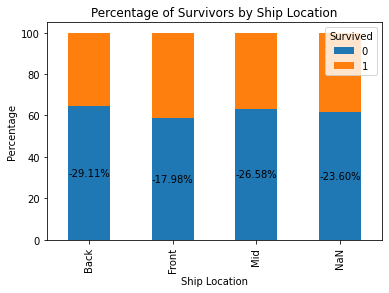

In [18]:
# ship location (front, mid, back, or NaN)

back = [102,100,98,96,94,92,90,88,86,84,82,80,78,76,148,146,144,142,140,138,136,134,132,130,128,126,117,119,121,123,125,127,93,91,89,87,85,83,81,79,77,75,73,71,69]
mid = [74,72,70,68,66,64,62,44,46,40,42,38,36,34,124,122,116,114,112,110,108,106,104,120,118,113,111,115,109,107,105,103,101,99,97,95,67,65,63,61,59,57,55,39,35,37]
front = [32,30,28,26,24,22,20,18,16,14,12,10,8,6,60,58,56,54,52,50,48,4,41,2,43,1,3,5,7,53,51,49,47,45,35,29,31,27,23,25,21,17,19,15,9,11]

def assign_location(val):
    if val=="NA" or val=="T":
        return "NaN"
    elif int(val[1:]) in back:
        return "Back"
    elif int(val[1:]) in mid:
        return "Mid"
    else:
        return "Front"

clean_train['Ship Location'] = clean_train['New Cabin'].apply(assign_location)
plot_percent_survivors(clean_train, 'Ship Location', 'Survived')

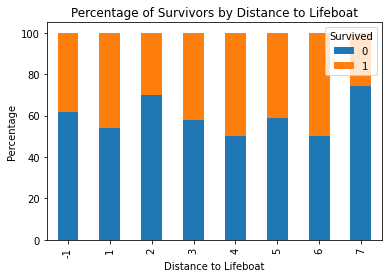

In [19]:
#Distance to lifeboat(top floor)

def distance(val):
    if val == 'NA' or val == 'T':
        return -1
    elif val[0] == 'A':
        return 1
    elif val[0] == 'B':
        return 2
    elif val[0] == 'C':
        return 3
    elif val[0] == 'D':
        return 4
    elif val[0] == 'E':
        return 5
    elif val[0] == 'F':
        return 6
    elif val[0] == 'G':
        return 7

def plot_percent_survivors_quant(df, cat_col, binary_col):
    # Create a grouped dataframe with counts for each category and binary variable
    grouped_df = df.groupby([cat_col, binary_col])[binary_col].count().unstack()
    
    # Calculate the percentage of survivors for each category
    df_perc = grouped_df.apply(lambda x: x/x.sum()*100, axis=1)

    # Calculate the percentage difference between categories
    df_diff = df_perc.diff(axis=1).iloc[:,1]

    # Create a stacked bar chart
    df_perc.plot(kind='bar', stacked=True)

    # Set the chart title and axis labels
    plt.title(f'Percentage of Survivors by {cat_col}')
    plt.xlabel(cat_col)
    plt.ylabel('Percentage')
    plt.show()

clean_train['Distance to Lifeboat'] = clean_train['New Cabin'].apply(distance)
plot_percent_survivors_quant(clean_train, 'Distance to Lifeboat', 'Survived')

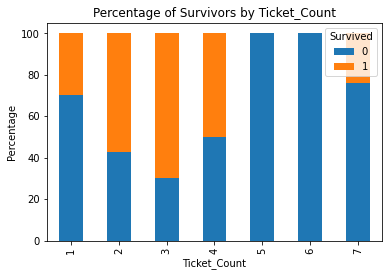

In [20]:
#number of ppl in a group
clean_train['Ticket_Count'] = clean_train['Ticket'].map(clean_train['Ticket'].value_counts())

plot_percent_survivors_quant(clean_train, 'Ticket_Count', 'Survived')

<AxesSubplot:>

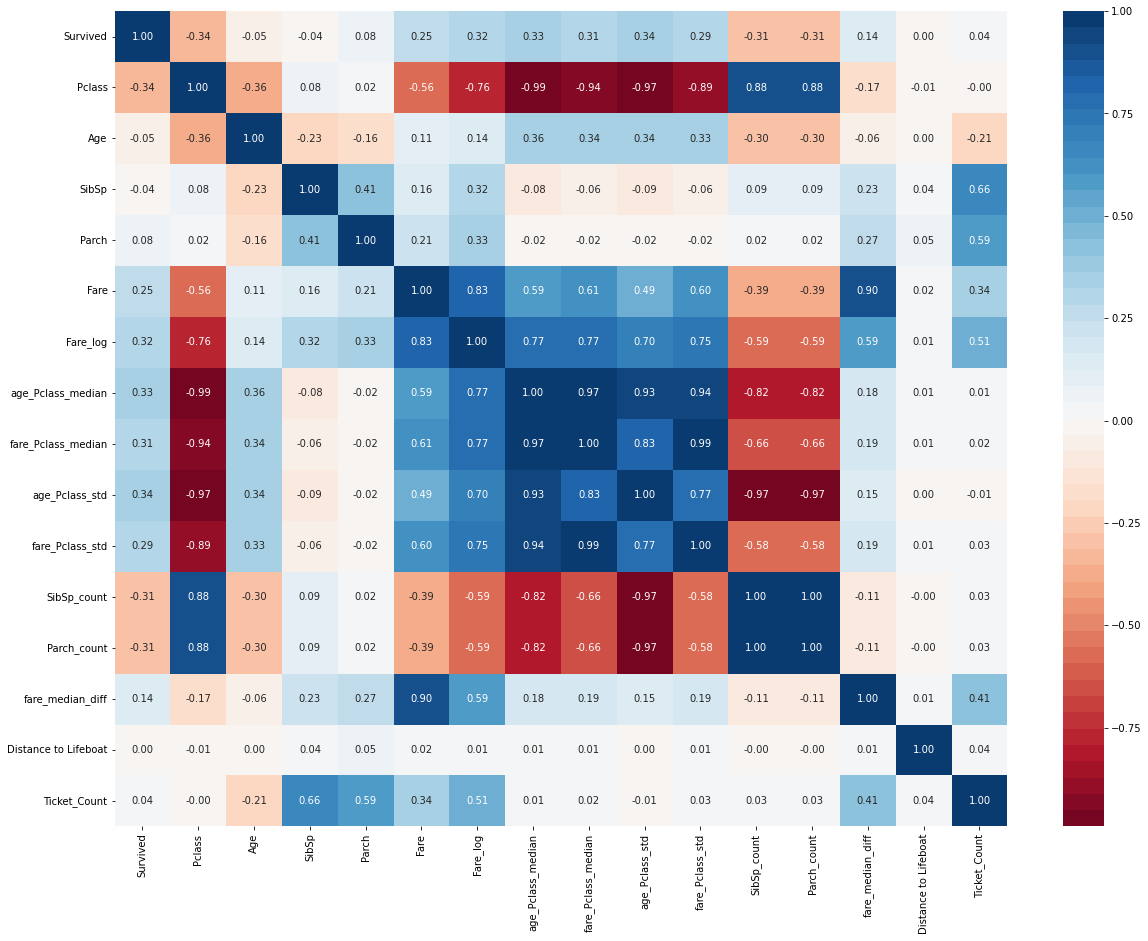

In [21]:
# correlations between the columns
plt.figure(figsize=(20, 15))
sns.heatmap(clean_train.corr(), annot=True, cmap=sns.color_palette('RdBu',50), fmt='.2f')

In [22]:
corr = clean_train.corr().abs()
sort = corr.sort_values(by=['Survived'],ascending=False)
print("Correlation of each variable to Survived:")
sort['Survived']

Correlation of each variable to Survived:


Survived                1.000000
Pclass                  0.338481
age_Pclass_std          0.336292
age_Pclass_median       0.331552
Fare_log                0.317489
SibSp_count             0.313463
Parch_count             0.313463
fare_Pclass_median      0.305927
fare_Pclass_std         0.288896
Fare                    0.250383
fare_median_diff        0.138036
Parch                   0.081629
Age                     0.052872
Ticket_Count            0.038247
SibSp                   0.035322
Distance to Lifeboat    0.003460
Name: Survived, dtype: float64

**Dropping Feature Enginereed Columns**

In [23]:
clean_train.drop(columns=['Cabin','Fare','Ticket','New Cabin'], inplace=True)
pd.set_option('display.max_columns', None)
clean_train.head()

Survived  Pclass     Sex   Age  SibSp  Parch Embarked  Fare_log  \
0         0       3    male  22.0      1      0        S  2.110213   
1         1       1  female  38.0      1      0        C  4.280593   
2         1       3  female  26.0      0      0        S  2.188856   
3         1       1  female  35.0      1      0        S  3.990834   
4         0       3    male  35.0      0      0        S  2.202765   

   age_Pclass_median  fare_Pclass_median  age_Pclass_std  fare_Pclass_std  \
0               24.0              8.0500       10.632997        11.723991   
1               35.0             61.9792       14.590796        77.383157   
2               24.0              8.0500       10.632997        11.723991   
3               35.0             61.9792       14.590796        77.383157   
4               24.0              8.0500       10.632997        11.723991   

   SibSp_count  Parch_count  fare_median_diff  Side of ship Ship Location  \
0          491          491           -0.8000           NaN           NaN   
1          216          216            9.3041         Right          Back   
2          491          491           -0.1250           NaN           NaN   
3          216          216           -8.8792  Right Center          Back   
4          491          491            0.0000           NaN           NaN   

   Distance to Lifeboat  Ticket_Count  
0                    -1             1  
1                     3             1  
2                    -1             1  
3                     3             2  
4                    -1             1

**One-hot Encoding**

In [24]:
#Since only 2/7 columns are categorical, I'm using one-hot encoding since there won't be that much sparsity 
clean_train = pd.get_dummies(data=clean_train, columns=['Sex', 'Embarked', 'Side of ship', 'Ship Location'],drop_first=True)
clean_train.head()

Survived  Pclass   Age  SibSp  Parch  Fare_log  age_Pclass_median  \
0         0       3  22.0      1      0  2.110213               24.0   
1         1       1  38.0      1      0  4.280593               35.0   
2         1       3  26.0      0      0  2.188856               24.0   
3         1       1  35.0      1      0  3.990834               35.0   
4         0       3  35.0      0      0  2.202765               24.0   

   fare_Pclass_median  age_Pclass_std  fare_Pclass_std  SibSp_count  \
0              8.0500       10.632997        11.723991          491   
1             61.9792       14.590796        77.383157          216   
2              8.0500       10.632997        11.723991          491   
3             61.9792       14.590796        77.383157          216   
4              8.0500       10.632997        11.723991          491   

   Parch_count  fare_median_diff  Distance to Lifeboat  Ticket_Count  \
0          491           -0.8000                    -1             1   
1          216            9.3041                     3             1   
2          491           -0.1250                    -1             1   
3          216           -8.8792                     3             2   
4          491            0.0000                    -1             1   

   Sex_male  Embarked_Q  Embarked_S  Side of ship_Left Center  \
0         1           0           1                         0   
1         0           0           0                         0   
2         0           0           1                         0   
3         0           0           1                         0   
4         1           0           1                         0   

   Side of ship_NaN  Side of ship_Right  Side of ship_Right Center  \
0                 1                   0                          0   
1                 0                   1                          0   
2                 1                   0                          0   
3                 0                   0                          1   
4                 1                   0                          0   

   Ship Location_Front  Ship Location_Mid  Ship Location_NaN  
0                    0                  0                  1  
1                    0                  0                  0  
2                    0                  0                  1  
3                    0                  0                  0  
4                    0                  0                  1

# Cleaning test data

In [25]:
clean_test = test.copy()
def clean(clean_test):
    clean_test.drop(columns=['Name'],inplace=True)
    
    #fixing Cabin invalid data
    clean_test['Cabin'] = clean_test['Cabin'].fillna('NA')
    val = []
    for index, row in clean_test['Cabin'].iteritems():
        if len(row) > 3 and row[3]==' ':
            count = 0;
            cabins = row.split(' ')
            for i, r in clean_test[clean_test['Cabin'] == row].iteritems():
                if(count<len(cabins)):
                    val.append(cabins[count])
                    count+=1
                else:
                    val.append(cabins[count-1])

        elif row[0]=='F' and len(row) > 1 and row[1]==' ':
            tmp = 'F' + str(random.randint(1, 148)) + row[1:]
            count = 0;
            cabins = tmp.split(' ')
            for i, r in clean_test[clean_test['Cabin'] == row].iteritems():
                if(count<len(cabins)):
                    val.append(cabins[count])
                    count+=1
                else:
                    val.append(cabins[count-1])
        elif (row[0]=='D'and len(row)==1) or (row[0]=='F'and len(row)==1):
            val.append(row+str(random.randint(1, 148)))
        else:
            val.append(row)

    clean_test['New Cabin'] = pd.DataFrame(val)
    clean_test['Age'].fillna(clean_test['Age'].mode().iloc[0], inplace=True)
    
    
    #data imputation
    def impute_median(row):
        return clean_test[clean_test['Pclass']==row['Pclass']]['Fare'].median()
    clean_test['Fare'] = clean_test['Fare'].replace(0, np.nan)
    missing_fares = clean_test['Fare'].isnull()
    clean_test.loc[missing_fares, 'Fare'] = clean_test[missing_fares].apply(impute_median, axis=1)
    
    clean_test['Embarked'].fillna(clean_test['Embarked'].mode().iloc[0], inplace=True)
    
    #data transformation
    clean_test['Fare_log'] = np.log(clean_test['Fare'] + 1)
    
    #feature engineering
    grouped_test = clean_test.groupby('Pclass')
    clean_test[['age_Pclass_median','fare_Pclass_median']] = grouped_test[['Age', 'Fare']].transform('median')
    clean_test[['age_Pclass_std','fare_Pclass_std']] = grouped_test[['Age', 'Fare']].transform('std')
    clean_test[['SibSp_count','Parch_count']] = grouped_test[['SibSp', 'Parch']].transform('count') 
    clean_test['fare_median_diff'] = clean_test['Fare']-clean_test['fare_Pclass_median']
    
    clean_test['Side of ship'] = clean_test['New Cabin'].apply(assign_side)
    clean_test['Ship Location'] = clean_test['New Cabin'].apply(assign_location)
    clean_test['Distance to Lifeboat'] = clean_test['New Cabin'].apply(distance)
    clean_test['Ticket_Count'] = clean_test['Ticket'].map(clean_test['Ticket'].value_counts())
    clean_test.drop(columns=['Cabin','Fare','Ticket','New Cabin'], inplace=True)
    
    
    clean_test = pd.get_dummies(data=clean_test, columns=['Sex', 'Embarked', 'Side of ship', 'Ship Location'],drop_first=True)
    
    return clean_test

clean_test = clean(clean_test)

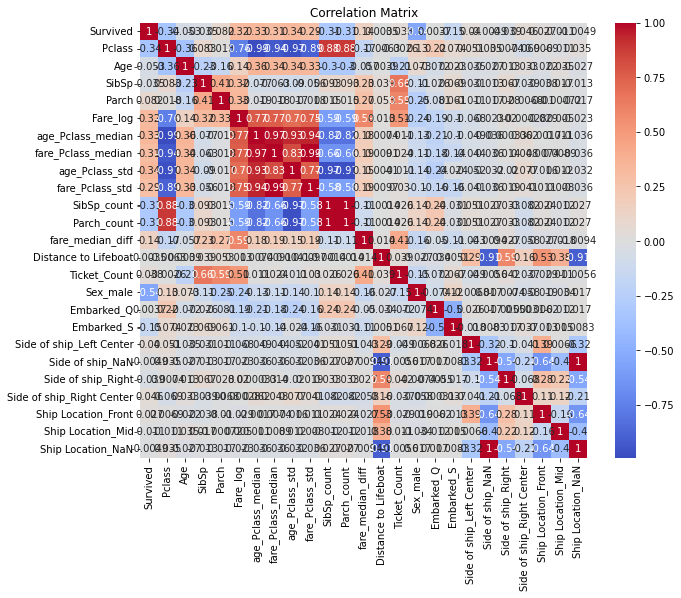

In [67]:
correlation_matrix = clean_train.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as desired
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()

**Exporting cleaned train,test data**

In [2]:
clean_train.to_csv('clean_train.csv',index=False)
clean_test.to_csv('clean_test.csv',index=False)

NameError: name 'clean_train' is not defined

# **Models**


In [69]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE

import xgboost as xgb
from sklearn.model_selection import StratifiedKFold
from matplotlib import pyplot
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

from lightgbm import LGBMClassifier

In [70]:
clean_train = pd.read_csv("clean_train.csv")
clean_test = pd.read_csv("clean_test.csv")

In [71]:
y_train = clean_train['Survived']
x_train = clean_train.drop(columns=['Survived'])
FS_vars=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare_log', 'age_Pclass_median',
       'fare_Pclass_median', 'age_Pclass_std', 'fare_Pclass_std',
       'SibSp_count', 'Parch_count', 'fare_median_diff',
       'Distance to Lifeboat', 'Ticket_Count', 'Sex_male', 'Embarked_S',
       'Side of ship_Left Center', 'Side of ship_NaN', 'Side of ship_Right',
       'Ship Location_Front']

x_train_FS = x_train[FS_vars]

**Baseline Model (log regression with only 1 var)** <br>
Accuracy: 60.2%

In [23]:
y_train = clean_train['Survived']
x_train = clean_train['Pclass'].values.reshape(-1, 1)
sc = StandardScaler()
x_train=sc.fit_transform(x_train)

pipeline = make_pipeline(LogisticRegression(class_weight="balanced"))
scores = cross_val_score(pipeline, x_train, y_train, scoring='accuracy')
scores.mean()

cross_val_scores = pd.DataFrame(scores.mean(),['Score'],['log_one_var'])
cross_val_scores

log_one_var
Score     0.667849

In [217]:
#log regression; only using Pclass variable as it has highest correlation with Survived

y_train = clean_train['Survived']
x_train = clean_train['Pclass'].values.reshape(-1, 1) #clean_train.drop(columns=['Survived'])



x_test = clean_test['Pclass'].values.reshape(-1, 1)#clean_test.drop(columns=['PassengerId'])
ids = clean_test['PassengerId'].values


sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

baseline = LogisticRegression(class_weight="balanced")
baseline.fit(x_train, y_train)


predictions = baseline.predict(x_test)

#submission file
sub = pd.DataFrame()
sub['PassengerId'] = ids.astype('int')
sub['Survived'] = predictions


subfolder_name = 'Submission'
filename = 'baseline.csv'
filepath = os.path.join(subfolder_name, filename)
sub.to_csv(filepath, index=False, float_format='%.5f')
print("Done!")

Done!


**Log Regression with all variables** <br>
Accuracy: 72.2%

In [24]:
y_train = clean_train['Survived']
x_train = clean_train.drop(columns=['Survived'])
sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)

pipeline = make_pipeline(LogisticRegression(class_weight="balanced",solver='newton-cholesky'))
scores = cross_val_score(pipeline, x_train, y_train, scoring='accuracy')

cross_val_scores['log_all_var'] = scores.mean()
cross_val_scores

log_one_var  log_all_var
Score     0.667849     0.772193

In [29]:
x_test = clean_test.drop(columns=['PassengerId'])
ids = clean_test['PassengerId'].values


sc=MinMaxScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

baseline = LogisticRegression(class_weight="balanced",solver='newton-cholesky')
baseline.fit(x_train, y_train)


predictions = baseline.predict(x_test)

#submission file
sub = pd.DataFrame()
sub['PassengerId'] = ids.astype('int')
sub['Survived'] = predictions

subfolder_name = 'Submission'
filename = 'logreg2.csv'
filepath = os.path.join(subfolder_name, filename)
sub.to_csv(filepath, index=False, float_format='%.5f')
print("Done!")

Done!


**Random Forest Classifier**<br>
Accuracy: 78.9%

In [31]:
pipeline = make_pipeline(RandomForestClassifier())
scores = cross_val_score(pipeline, x_train, y_train, scoring='accuracy')

cross_val_scores['rf'] = scores.mean()
cross_val_scores

log_one_var  log_all_var        rf     rf_gs
Score     0.667849     0.772193  0.808104  0.828297

In [73]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf.get_params()

#max_depth=50, min_samples_leaf=2

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

C:\Users\Ian\AppData\Local\Temp/ipykernel_16552/2024450333.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(df_list, rotation=0)  # Adjust rotation angle (0 for horizontal labels)


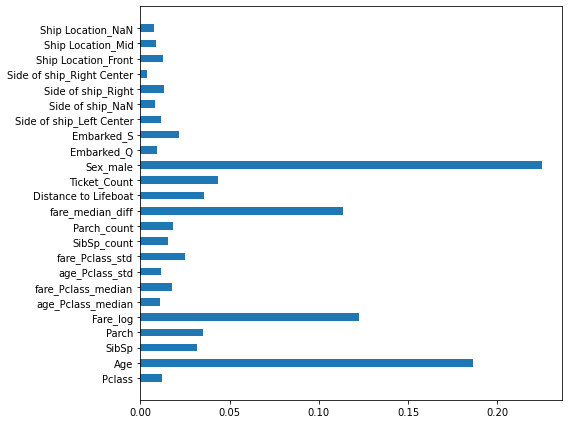

In [64]:
#feature importance
importances = rf.feature_importances_
sorted_idx = rf.feature_importances_.argsort()
df_list = list(x_train.columns)
fig, ax = plt.subplots(figsize=(8, 6))  # Adjust the figure size as desired
ax.barh(df_list, importances, height=0.5)
ax.set_yticklabels(df_list, rotation=0)  # Adjust rotation angle (0 for horizontal labels)
plt.tight_layout()  # Improves spacing and prevents label overlap

plt.show()

In [32]:
#GridSearchCV before feature selection
param_grid = {
    'max_depth': [39,40,41,42, 43,44,45],
    'max_features': [0.55,0.55,0.56,0.57,0.58],
    'min_samples_leaf': [2],
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(x_train, y_train)
best_grid = grid_search.best_estimator_ #RandomForestClassifier(max_depth=44, max_features=0.57, min_samples_leaf=2)
print(grid_search.best_estimator_)
cross_val_scores['rf_gs'] = grid_search.best_score_
cross_val_scores

Fitting 5 folds for each of 1 candidates, totalling 5 fits
RandomForestClassifier(max_depth=44, max_features=0.57, min_samples_leaf=2)


log_one_var  log_all_var        rf     rf_gs
Score     0.667849     0.772193  0.808104  0.822685

In [ ]:
#Determining the appropriate value for 'n_features_to_select'
'''
rf = RandomForestClassifier()
rfe = RFE(estimator=rf)

param_grid = {'n_features_to_select': [19,20,21,22,23]}  # Define the values to search

grid_search = GridSearchCV(estimator=rfe, param_grid=param_grid, cv=5)
grid_search.fit(x_train, y_train)

best_n_features = grid_search.best_params_['n_features_to_select']
print("Best n_features_to_select:", best_n_features)
'''

#determing features for feature selection using RFE(stepwise)
rf = RandomForestClassifier(max_depth=44, max_features=0.57, min_samples_leaf=2)
rfe = RFE(estimator=rf, n_features_to_select=8)
rfe.fit(x_train, y_train)

print("Selected features:", x_train.columns[rfe.support_])

In [36]:
FS_vars=['Pclass', 'Age', 'SibSp', 'Parch', 'Fare_log', 'age_Pclass_median',
       'fare_Pclass_median', 'age_Pclass_std', 'fare_Pclass_std',
       'SibSp_count', 'Parch_count', 'fare_median_diff',
       'Distance to Lifeboat', 'Ticket_Count', 'Sex_male', 'Embarked_S',
       'Side of ship_Left Center', 'Side of ship_NaN', 'Side of ship_Right',
       'Ship Location_Front']

x_train_FS = x_train[FS_vars]

pipeline = make_pipeline(RandomForestClassifier(max_depth=44, max_features=0.57, min_samples_leaf=2))
scores = cross_val_score(pipeline, x_train_FS, y_train, scoring='accuracy')

cross_val_scores['rf_gs_fs'] = scores.mean()
cross_val_scores

In [36]:
#hyperparmater tuning after fs
param_grid = {
    'max_depth': [38,39,40,41,42,44],
    'max_features': [0.53,0.55,0.57,0.59,0.61,0.63],
    'min_samples_leaf': [2],
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 2)
grid_search.fit(x_train_FS, y_train)
best_grid = grid_search.best_estimator_ #RandomForestClassifier(max_depth=39, max_features=0.57, min_samples_leaf=2)
print(grid_search.best_estimator_)
cross_val_scores['rf_gs_fs_gs'] = grid_search.best_score_
cross_val_scores

Fitting 5 folds for each of 1 candidates, totalling 5 fits
RandomForestClassifier(max_depth=39, max_features=0.57, min_samples_leaf=2)


log_one_var  log_all_var        rf     rf_gs  rf_gs_fs  rf_gs_fs_gs
Score     0.667849     0.772193  0.808104  0.822685  0.833896     0.827167

In [121]:
x_test = clean_test[FS_vars]
ids = clean_test['PassengerId'].values



rf = RandomForestClassifier(max_depth=39, max_features=0.57, min_samples_leaf=2)
rf.fit(x_train_FS, y_train)


predictions = rf.predict(x_test)

#submission file
sub = pd.DataFrame()
sub['PassengerId'] = ids.astype('int')
sub['Survived'] = predictions

subfolder_name = 'Submission'
filename = 'rf1.csv'
filepath = os.path.join(subfolder_name, filename)
sub.to_csv(filepath, index=False, float_format='%.5f')
print("Done!")

Done!


**XGBoost Classifier**

In [18]:
#setting default params
params = {
            'objective':'binary:logistic',
            'max_depth': 3,
            'learning_rate': 0.1,
            'n_estimators':100,
            'booster':'gbtree',
        }   
pipeline = make_pipeline(xgb.XGBClassifier(**params)) #"**" to unpackage dictionary
scores = cross_val_score(pipeline, x_train, y_train, scoring='accuracy')

#cross_val_scores['xgb'] = scores.mean()
#cross_val_scores
scores.mean()

0.826062394074446

In [25]:
#k-fold Cross Validation for XGBoost 
data_dmatrix = xgb.DMatrix(data=x_train,label=y_train)

params = {"objective":"binary:logistic",'booster':'gbtree','learning_rate': 0.1,
                'max_depth': 3}

xgb_cv = cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)
xgb_cv.head()

train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0        0.869417       0.009611       0.850465      0.036578
1        0.874945       0.010794       0.853103      0.037653
2        0.876888       0.010585       0.852877      0.037438
3        0.878960       0.009954       0.852113      0.033704
4        0.878573       0.008780       0.851877      0.034528

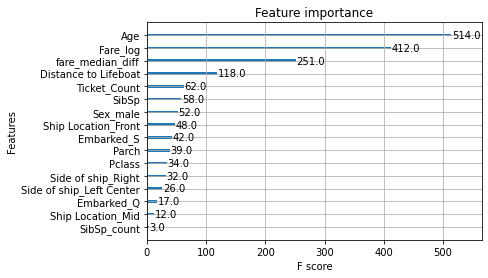

<Figure size 1152x864 with 0 Axes>

In [27]:
xgb.plot_importance(xgb_clf)
plt.figure(figsize = (16, 12))
plt.tight_layout()
plt.show()

Best: -0.414706 using {'learning_rate': 0.01, 'n_estimators': 400}
-0.688406 (0.000333) with: {'learning_rate': 0.0001, 'n_estimators': 100}
-0.683753 (0.000666) with: {'learning_rate': 0.0001, 'n_estimators': 200}
-0.679189 (0.000998) with: {'learning_rate': 0.0001, 'n_estimators': 300}
-0.674696 (0.001349) with: {'learning_rate': 0.0001, 'n_estimators': 400}
-0.670302 (0.001702) with: {'learning_rate': 0.0001, 'n_estimators': 500}
-0.649588 (0.003463) with: {'learning_rate': 0.001, 'n_estimators': 100}
-0.613556 (0.006800) with: {'learning_rate': 0.001, 'n_estimators': 200}
-0.583656 (0.009789) with: {'learning_rate': 0.001, 'n_estimators': 300}
-0.558996 (0.012338) with: {'learning_rate': 0.001, 'n_estimators': 400}
-0.538230 (0.014569) with: {'learning_rate': 0.001, 'n_estimators': 500}
-0.471675 (0.023662) with: {'learning_rate': 0.01, 'n_estimators': 100}
-0.423374 (0.034968) with: {'learning_rate': 0.01, 'n_estimators': 200}
-0.416036 (0.042961) with: {'learning_rate': 0.01, 'n_

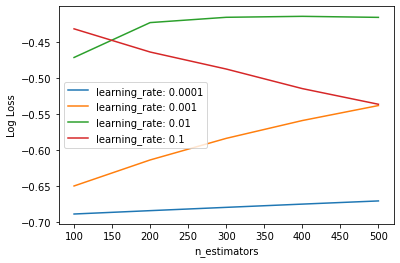

In [23]:
#determine n_estimators and learning rate
model = xgb.XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(x_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))
# plot results
scores = np.array(means).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.show()

**Hyperparameter Tuning using HYPEROPT**

In [53]:
new_df = x_train.drop('SibSp_count', axis=1)

#step 1: initialize domain space
space={
        #tree-specific params
        'max_depth': hp.quniform("max_depth", 3, 10, 1),
        'gamma': hp.uniform ('gamma', 0,9),
        'subsample': hp.uniform('subsample', 0.5,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        #regularization params
        'reg_alpha' : hp.quniform('reg_alpha', 0,100,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        
    }

#step 2: Define objective function
data_dmatrix = xgb.DMatrix(data=new_df,label=y_train)

def objective(space):
    params = {
        'max_depth': int(space['max_depth']),
        'gamma': space['gamma'],
        'subsample': space['subsample'],
        'colsample_bytree': space['colsample_bytree'],
        'min_child_weight': space['min_child_weight'],
        'reg_alpha': space['reg_alpha'],
        'reg_lambda': space['reg_lambda'],
        'learning_rate': 0.01
    }
  
    xgb_cv = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=400, early_stopping_rounds=50, metrics="auc", seed=50)
    
    mean = xgb_cv['test-auc-mean'].mean();
    
    print ("SCORE:", mean)
    return {'loss': -mean, 'status': STATUS_OK }

#Step 3: optimization algorithm
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 500,
                        trials = trials)

#Step 4: results
print("The best hyperparameters are : ","\n")
print(best_hyperparams)
#acc: 0.8712776658585115
#{'colsample_bytree': 0.7426433487727715, 'gamma': 0.015968670119603033, 'max_depth': 5.0, 'min_child_weight': 1.0, 
#'reg_alpha': 0.0, 'reg_lambda': 0.833323132976339, 'subsample': 0.7727434849179288}

#0.8714682354065373
#{'colsample_bytree': 0.8987592799886178, 'gamma': 0.8179720392055736, 'max_depth': 6.0, 'min_child_weight': 2.0, 'reg_alpha': 0.0, 'reg_lambda': 0.9308615429989225, 'subsample': 0.664340780258037}

SCORE:                                                                                                                 
0.5851614786817768                                                                                                     
SCORE:                                                                                                                 
0.766602551000142                                                                                                      
SCORE:                                                                                                                 
0.8362224348948442                                                                                                     
SCORE:                                                                                                                 
0.8079465251343416                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.8473745643743404                                                                                                     
SCORE:                                                                                                                 
0.8538838644209602                                                                                                     
SCORE:                                                                                                                 
0.8693330585939534                                                                                                     
SCORE:                                                                                                                 
0.851323643964144                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
0.868361978284907                                                                                                      
SCORE:                                                                                                                 
0.8396000834984333                                                                                                     
SCORE:                                                                                                                 
0.8352363678396659                                                                                                     
SCORE:                                                                                                                 
0.8367549495065274                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.7675449806779403                                                                                                     
SCORE:                                                                                                                 
0.7296445963315571                                                                                                     
SCORE:                                                                                                                 
0.766602551000142                                                                                                      
SCORE:                                                                                                                 
0.8518581843858012                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.8381258993603502                                                                                                     
SCORE:                                                                                                                 
0.8572548715935251                                                                                                     
SCORE:                                                                                                                 
0.8400875229889845                                                                                                     
SCORE:                                                                                                                 
0.8511363208895733                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.84984117865965                                                                                                       
SCORE:                                                                                                                 
0.8436502590648406                                                                                                     
SCORE:                                                                                                                 
0.84418444094645                                                                                                       
SCORE:                                                                                                                 
0.8524816308873688                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.8544887012921055                                                                                                     
SCORE:                                                                                                                 
0.8677339102890301                                                                                                     
SCORE:                                                                                                                 
0.8601378011083719                                                                                                     
SCORE:                                                                                                                 
0.8655498508009338                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
0.862348884241556                                                                                                      
SCORE:                                                                                                                 
0.8409069026240726                                                                                                     
SCORE:                                                                                                                 
0.8223984116191567                                                                                                     
SCORE:                                                                                                                 
0.8431565282823422                                                                                                     
SCORE:                                  

In [45]:
cross_val_scores = pd.read_csv("cross_val_scores.csv")
cross_val_scores.head()

log_one_var  log_all_var        rf     rf_gs  rf_gs_fs  rf_gs_fs_gs  \
0     0.667849     0.772193  0.808104  0.822685  0.833896     0.827167   

        xgb  xgb_HYPEROPT      lgbm  
0  0.820432       0.83168  0.815944

In [55]:
#params = {'colsample_bytree': 0.7426433487727715, 'gamma': 0.015968670119603033, 'max_depth': 5, 'min_child_weight': 1, 
#'reg_alpha': 0, 'reg_lambda': 0.833323132976339, 'subsample': 0.7727434849179288, 'learning_rate':0.01, 'n_estimators':400}
{'colsample_bytree': 0.8987592799886178, 'gamma': 0.8179720392055736, 'max_depth': 6.0, 'min_child_weight': 2.0, 
 'reg_alpha': 0.0, 'reg_lambda': 0.9308615429989225, 'subsample': 0.664340780258037, 'learning_rate':0.01, 'n_estimators':400}


pipeline = make_pipeline(xgb.XGBClassifier(**params))
scores = cross_val_score(pipeline, new_df, y_train, scoring='accuracy')

cross_val_scores['xgb_HYPEROPT'] = scores.mean()
cross_val_scores

0.8294269035214363

In [73]:
x_test = clean_test.drop(columns=['PassengerId'])
ids = clean_test['PassengerId'].values

xgb = xgb.XGBClassifier(**params)
xgb.fit(x_train,y_train)

predictions = xgb.predict(x_test)

#submission file
sub = pd.DataFrame()
sub['PassengerId'] = ids.astype('int')
sub['Survived'] = predictions

subfolder_name = 'Submission'
filename = 'xgb_HYPEROPT2.csv'
filepath = os.path.join(subfolder_name, filename)
sub.to_csv(filepath, index=False, float_format='%.5f')
print("Done!")

Done!


**LightGBM Classifier**

In [34]:
pipeline = make_pipeline(LGBMClassifier())
scores = cross_val_score(pipeline, x_train, y_train, scoring='accuracy')

cross_val_scores['lgbm'] = scores.mean()
cross_val_scores

log_one_var  log_all_var        rf     rf_gs  rf_gs_fs  rf_gs_fs_gs  \
0     0.667849     0.772193  0.808104  0.822685  0.833896     0.827167   

        xgb  xgb_HYPEROPT      lgbm  
0  0.820432       0.83168  0.815944

In [ ]:
param_grid = {
    'class_weight': [None, 'balanced'],
    'boosting_type': ['gbdt', 'goss', 'dart'],
    'num_leaves': list(range(30, 150)),
    'learning_rate': list(np.logspace(np.log(0.005), np.log(0.2), base = np.exp(1), num = 1000)),
    'subsample_for_bin': list(range(20000, 300000, 20000)),
    'min_child_samples': list(range(20, 500, 5)),
    'reg_alpha': list(np.linspace(0, 1)),
    'reg_lambda': list(np.linspace(0, 1)),
    'colsample_bytree': list(np.linspace(0.6, 1, 10)),
    'encoding': ['one_hot', 'label']
}

params = {
        'class_weight': space['class_weight'],
        'boosting_type': space['boosting_type']['boosting_type'],
        'num_leaves': space['num_leaves'],
        'learning_rate': space['learning_rate'],
        'subsample_for_bin': space['subsample_for_bin'],
        'min_child_samples': space['min_child_samples'],
        'reg_alpha': space['reg_alpha'],
        'reg_lambda': space['reg_lambda'],
        'colsample_bytree': space['colsample_bytree']
    }

In [35]:
cross_val_scores.to_csv('cross_val_scores.csv',index=False)